In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("company.csv")
df

,Company,Assets,Sales,Market_Value,Profits,Cash_Flow,Employees,sector
0,Air Products,2687,1870,1890,145.7,352.2,18.2,Other
1,Allied Signal,13271,9115,8190,-279.0,83.0,143.8,Other
2,American Electric Power,13621,4848,4572,485.0,898.9,23.4,Energy
3,American Savings Bank FSB,3614,367,90,14.1,24.6,1.1,Finance
4,AMR,6425,6131,2448,345.8,682.5,49.5,Transportation
...,...,...,...,...,...,...,...,...
74,Valero Energy,1995,2662,341,34.7,100.7,2.3,Energy
75,Warner Communications,2286,2235,2306,195.3,219.0,8.0,Other
76,Western Air Lines,952,1307,309,35.4,92.8,10.3,Transportation
77,Wickes Cos,2957,2806,457,40.6,93.5,50.0,Retail


In [3]:
# Set label and features
y = df['Assets']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Assets'])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                 Assets   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     26.22
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           4.63e-15
Time:                        08:11:35   Log-Likelihood:                -791.64
No. Observations:                  79   AIC:                             1595.
Df Residuals:                      73   BIC:                             1609.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sales            1.4708      0.346      4.247   

In [9]:
df.select_dtypes(include=['number']).skew()


Assets          3.316424
Sales           4.432814
Market_Value    7.433555
Profits         6.848723
Cash_Flow       6.681042
Employees       3.589348
dtype: float64

In [13]:
print(np.log(df.Assets).skew())
print(np.sqrt(df.Assets).skew())
print(np.square(df.Assets).skew())

0.14002405116188396
1.786694453948146
5.1980719382251


In [15]:
df['Assets_ln'] = np.log(df['Assets'])
df

,Company,Assets,Sales,Market_Value,Profits,Cash_Flow,Employees,sector,Assets_ln
0,Air Products,2687,1870,1890,145.7,352.2,18.2,Other,7.896181
1,Allied Signal,13271,9115,8190,-279.0,83.0,143.8,Other,9.493336
2,American Electric Power,13621,4848,4572,485.0,898.9,23.4,Energy,9.519368
3,American Savings Bank FSB,3614,367,90,14.1,24.6,1.1,Finance,8.192570
4,AMR,6425,6131,2448,345.8,682.5,49.5,Transportation,8.767952
...,...,...,...,...,...,...,...,...,...
74,Valero Energy,1995,2662,341,34.7,100.7,2.3,Energy,7.598399
75,Warner Communications,2286,2235,2306,195.3,219.0,8.0,Other,7.734559
76,Western Air Lines,952,1307,309,35.4,92.8,10.3,Transportation,6.858565
77,Wickes Cos,2957,2806,457,40.6,93.5,50.0,Retail,7.991931


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        Feature        VIF
0         Sales  14.354861
1  Market_Value  26.299314
2       Profits  74.369094
3     Cash_Flow  72.440912
4     Employees   7.366061
5         const   1.662941


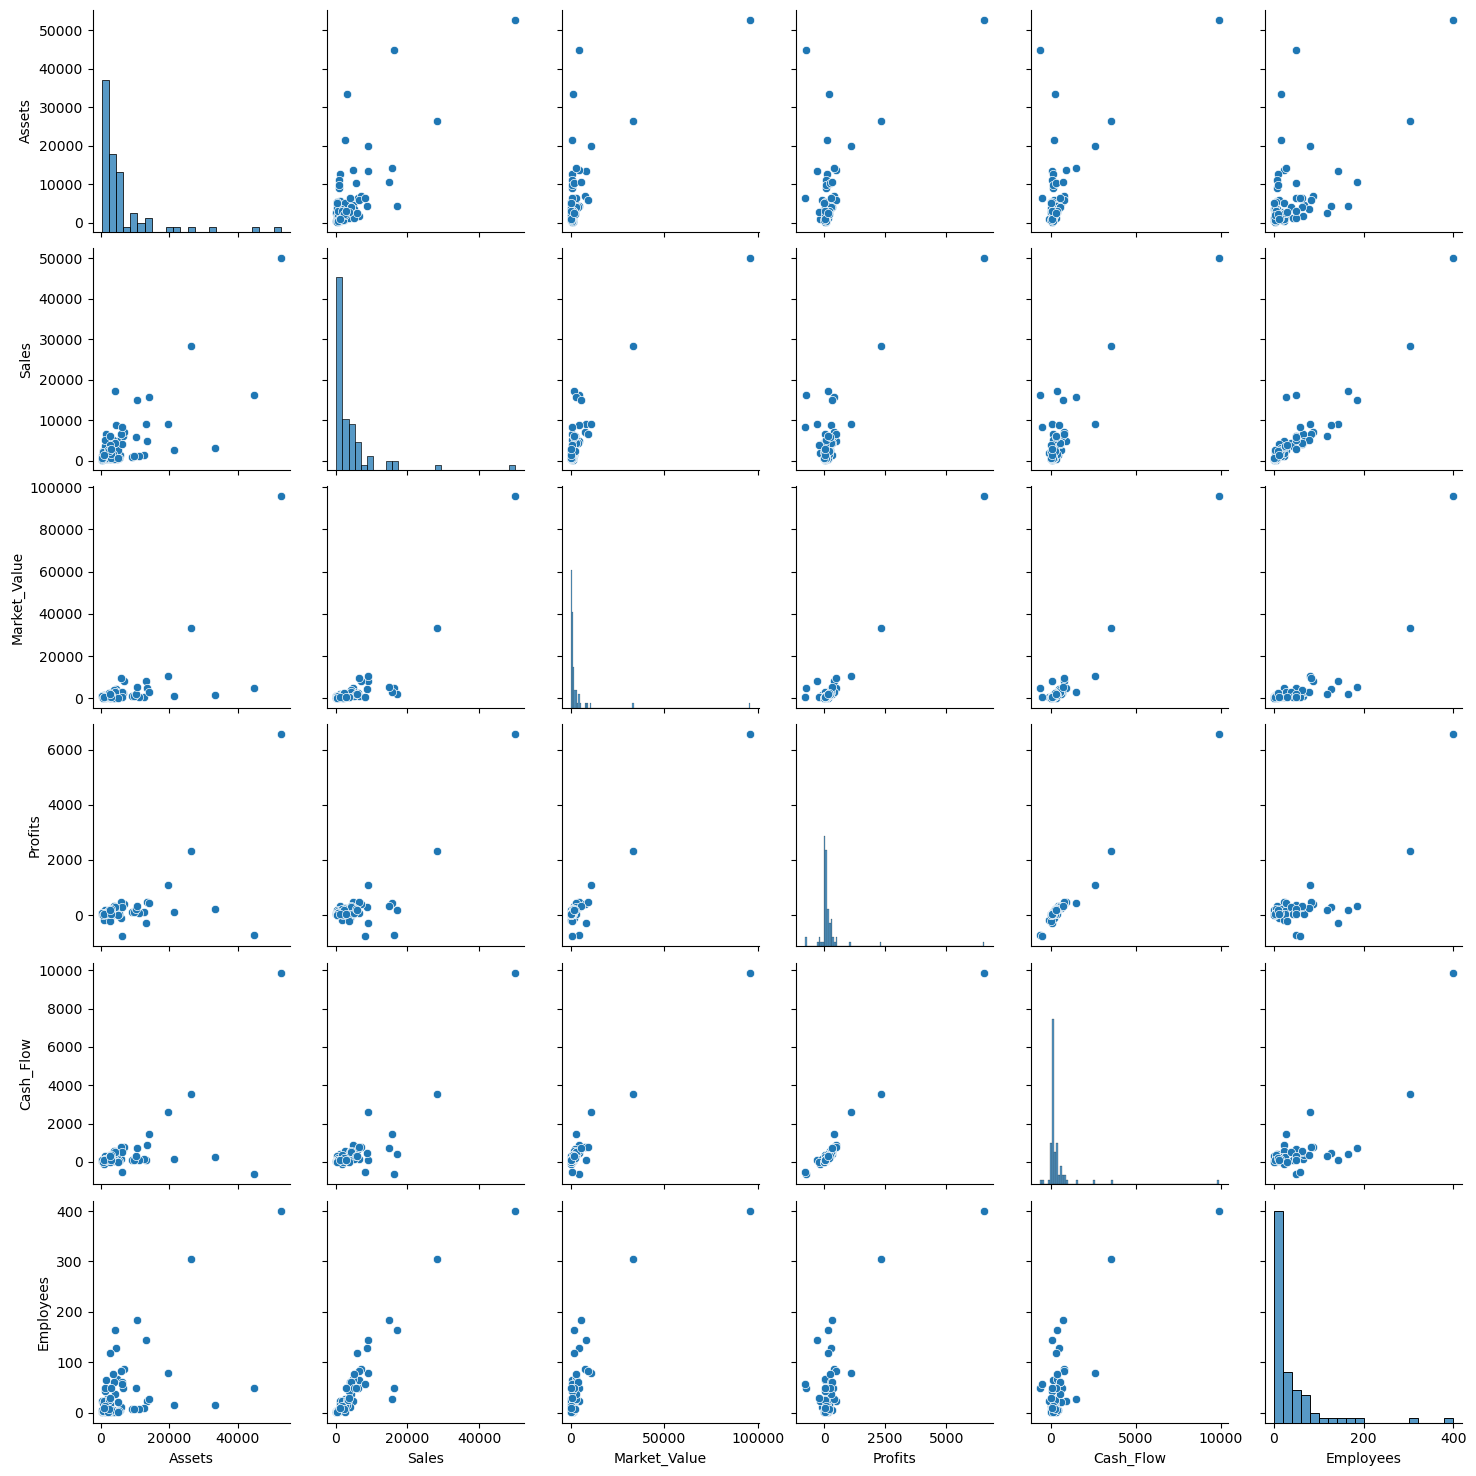

In [10]:
import seaborn as sn

sn.pairplot(df)

In [23]:
# Set label and features
y = df['Assets_ln']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Assets_ln', "Assets", "Market_Value", "Employees", "Cash_Flow" ])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:              Assets_ln   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     17.95
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           4.12e-07
Time:                        08:36:13   Log-Likelihood:                -111.60
No. Observations:                  79   AIC:                             229.2
Df Residuals:                      76   BIC:                             236.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sales          0.0001   2.82e-05      4.672      0.0

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Feature       VIF
0    Sales  2.960604
1  Profits  2.960604
2    const  1.506964


0.9917976746405309

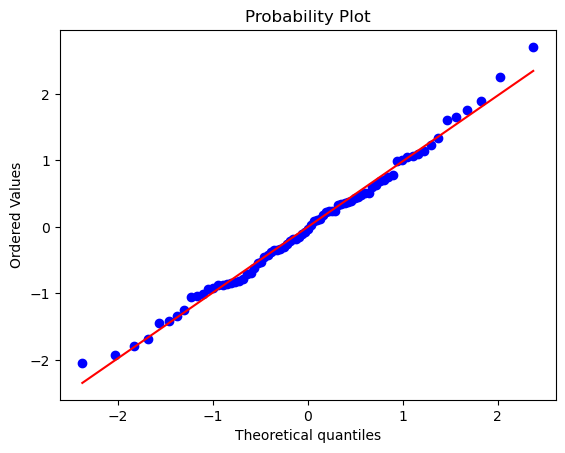

In [17]:
pred_val = model.fittedvalues.copy()
true_val = df['Assets_ln'].values.copy()
residual = true_val - pred_val

import scipy as sp
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [ ]:
import seaborn as sn

sn.pairplot(df)